In [18]:
import os

import matplotlib.pyplot as plt
from scipy.io import wavfile
import kapre
import numpy as np
from tensorflow.keras.models import Sequential

plt.style.use('ggplot')

In [19]:
stft_model = Sequential()
stft_model.add(kapre.STFT(n_fft=512, hop_length=160, input_shape=(1, 16000)))

mel_model = Sequential()
mel_model.add(kapre.composed.get_melspectrogram_layer(n_mels=128, input_shape=(1,16000) ) )

In [20]:
def plot_signals_time(titles, signals):
    nrows, ncols = 2, 5
    fig, ax = plt.subplots(nrows, ncols, figsize=(16, ncols))
    
    for i in range(nrows):
        for y in range(ncols):
            ax[i,y].set_title(titles[y])
            ax[i,y].plot(signals[y])
            ax[i,y].set_xticks([])
            ax[i,y].set_yticks([])
            ax[i,y].grid(False)
    
    plt.show()


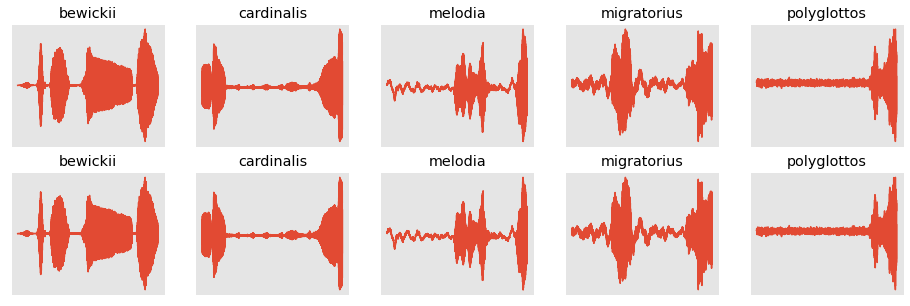

In [21]:
src_root = '../clean'

classes = os.listdir(src_root)
signals = []
titles = []
stft_specs = []
mel_specs = []

for _cls in sorted(classes):
    batch = []
    for fn in sorted(os.listdir(os.path.join(src_root, _cls))):
        rate, wav = wavfile.read(os.path.join(src_root, _cls, fn))
        signals.append(wav)
        titles.append(_cls)
        
        sample = wav.reshape(-1, 1)
        if sample.shape[0] < 1:
            tmp = np.zeros(shape=(1, 1), dtype=np.float32)
            tmp[:sample.shape[0], :] = sample.flatten().reshape(-1, 1)
            sample = tmp
        batch.append(sample)
        batch = np.array(batch, dtype=np.float32)
        spec = stft_model.predict(batch)
        mel = mel_model.predict(batch)
        stft_specs.append(spec)
        mel_specs.append(mel)
        break

plot_signals_time(titles, signals)

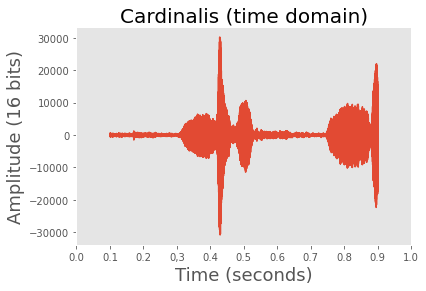

In [22]:
rate, wav = wavfile.read(os.path.join(
    src_root, 'cardinalis', '11713-0_0.wav'))

plt.plot(wav)
plt.title('Cardinalis (time domain)', size=20)
plt.grid(False)
locs, labels = plt.xticks()
plt.xticks(locs, ['0.0', '0.1', '0.2', '0,3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0' ])
plt.ylabel('Amplitude (16 bits)', size=18)
plt.xlabel('Time (seconds)', size=18)
plt.show()


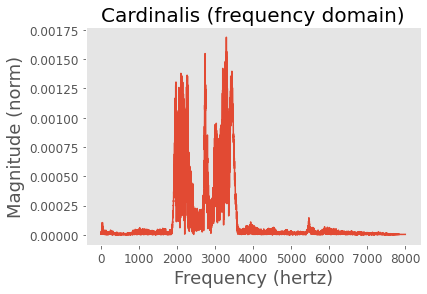

In [23]:
fft = np.fft.rfft(wav)
plt.plot(np.abs(fft)/np.sum(np.abs(fft)))
plt.title('Cardinalis (frequency domain)', size=20)
plt.grid(False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Magnitude (norm)', size=18)
plt.xlabel('Frequency (hertz)', size=18)
plt.show()
